In [1]:
import queue
import matplotlib.pyplot as plt

## 1. Read data functions

In [2]:
# getting heuristics from file
def getHeuristics():
    heuristics = {}
    f = open("heuristics1.txt")
    for i in f.readlines():
        node_heuristic_val = i.split()
        heuristics[node_heuristic_val[0]] = int(node_heuristic_val[1])
    f.close()
    return heuristics

def getCity():
    city = {}
    citiesCode = {}
    f = open("cities1.txt")
    j = 1
    for i in f.readlines():
        node_city_val = i.split()
        city[node_city_val[0]] = [int(node_city_val[1]), int(node_city_val[2])]

        citiesCode[j] = node_city_val[0]
        j += 1
    f.close()
    return city, citiesCode

def createGraph():
    graph = {}
    file = open("citiesGraph.txt")
    for i in file.readlines():
        node_val = i.split()

        if node_val[0] in graph and node_val[1] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})

            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})
        
        elif node_val[0] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})
            graph[node_val[1]] = [[node_val[0], node_val[2]]]
        
        elif node_val[1] in graph:
            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})
            graph[node_val[0]] = [[node_val[1], node_val[2]]]

        else:
            graph[node_val[0]] = [[node_val[1], node_val[2]]]
            graph[node_val[1]] = [[node_val[0], node_val[2]]]
    
    return graph

def drawMap(city, gbfs, astar, graph):
    for i, j in city.items():
        plt.plot(j[0], j[1], "ro")
        plt.annotate(i, (j[0], j[1]))

        for k in graph[i]:
            n = city[k[0]]
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray")

    for i in range(len(gbfs)):
        try:
            first = city[gbfs[i]]
            secend = city[gbfs[i+1]]

            plt.plot([first[0], secend[0]], [first[1], secend[1]], "green")
        except:
            continue
    
    for i in range(len(astar)):
        try:
            first = city[astar[i]]
            secend = city[astar[i+1]]

            plt.plot([first[0], secend[0]], [first[1], secend[1]], "blue")
        except:
            continue
    
    plt.errorbar(1, 1, label="GBFS", color="green")
    plt.errorbar(1, 1, label="ASTAR", color="blue")
    plt.legend(loc="lower left")

    plt.show()

## 2. GBFS

In [3]:
def GBFS(startNode, heuristics, graph, goalNode):
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristics[startNode], startNode))

    path = []

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current)

        if current == goalNode:
            break
    
        priorityQueue = queue.PriorityQueue()

        for i in graph[current]:
            if i[0] not in path:
                priorityQueue.put((heuristics[i[0]], i[0]))
    
    return path

## 3. A-star Search

In [4]:
def Astar(startNode, heuristics, graph, goalNode):
    priorityQueue = queue.PriorityQueue()
    distance = 0
    path = []

    priorityQueue.put((heuristics[startNode] + distance, [startNode, 0]))

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current[0])
        distance += int(current[1])

        if current[0] == goalNode:
            break

        priorityQueue = queue.PriorityQueue()

        for i in graph[current[0]]:
            if i[0] not in path:
                priorityQueue.put((heuristics[i[0]] + int(i[1]) + distance, i))
        
    return path

## 4. Run Code

In [5]:
def main():
    heuristics = getHeuristics()
    graph = createGraph()
    city, citiesCode = getCity()

    for i, j in citiesCode.items():
        print(i, j)

    while True:
        inputCode1 = int(input("Nhập đỉnh bắt đầu: "))
        inputCode2 = int(input("Nhập đỉnh kết thúc: "))

        if inputCode1 == 0 or inputCode2 == 0:
            break
    
        startCity = citiesCode[inputCode1]
        endCity = citiesCode[inputCode2]

        gbfs = GBFS(startCity, heuristics, graph, endCity)
        astar = Astar(startCity, heuristics, graph, endCity)
        print("GBFS => ", gbfs)
        print("ASTAR => ", astar)

        drawMap(city, gbfs, astar, graph)

1 Arad
2 Bucharest
3 Craiova
4 Dobreta
5 Eforie
6 Fagaras
7 Giurgiu
8 Hirsova
9 Iasi
10 Lugoj
11 Mehadia
12 Neamt
13 Oradea
14 Pitesti
15 Rimnicu_Vilcea
16 Sibiu
17 Timisoara
18 Urziceni
19 Vaslui
20 Zerind
GBFS =>  ['Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Urziceni', 'Hirsova']
ASTAR =>  ['Arad', 'Sibiu', 'Rimnicu_Vilcea', 'Pitesti', 'Bucharest', 'Urziceni', 'Hirsova']


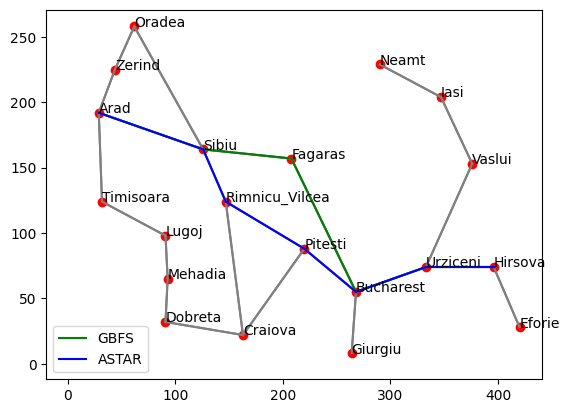

In [6]:
main()

## 5. Ví dụ Code sai

## 5.1. Đặt lại hàng đợi trong vòng While

Caculated Heuristics: {'A': 3.1622776601683795, 'B': 1.9525624189766635, 'C': 2.5317977802344327, 'E': 0.0}
GBFS =>  ['A', 'B', 'C', 'E']
ASTAR =>  ['A', 'C', 'E']


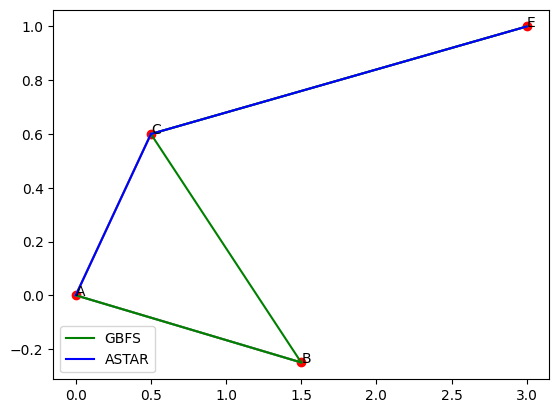

In [17]:
from math import sqrt

def test_case(start, end, graph, heuristics, city):
    gbfs = GBFS(start, heuristics, graph, end)
    astar = Astar(start, heuristics, graph, end)
    print("GBFS => ", gbfs)
    print("ASTAR => ", astar)

    drawMap(city, gbfs, astar, graph)

def calculate_heuristics(city, endPoint):
    # hàm xây dựng nên Heuristic bằng cách tính thủ công khoảng cách L2 (đường chim bay)
    heuristics = {}
    endPointLocation = city.get(endPoint)
    for point in city.keys():
        location = city[point]
        distance = sqrt((location[0] - endPointLocation[0])**2 + (location[1] - endPointLocation[1])**2)
        heuristics[point] = distance
    return heuristics

graph_test = {
    'A': [['B', 2], ['C', 1]],
    'B': [['A', 1]],
    'C': [['A', 1], ['E', 1]],
    'E': [['C', 1]] # E là điểm đích
}

heuristics_test = calculate_heuristics(city_test, 'E')

city_test = {
    'A': [0, 0],
    'B': [1.5, -0.25],
    'C': [0.5, 0.6],
    'E': [3, 1] # E là điểm đích
}
print("Caculated Heuristics:", heuristics_test)

test_case('A', 'E', graph_test, heuristics_test, city_test)

## 5.2. Không theo dõi chi phí tích lũy riêng cho từng đỉnh trong A-star

GBFS =>  ['A', 'C', 'D', 'E']
ASTAR =>  ['A', 'C', 'D', 'E']


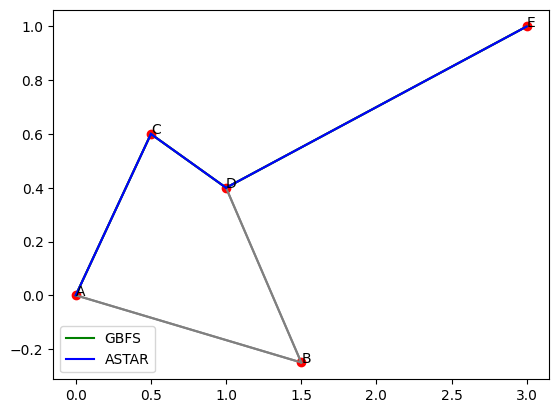

In [18]:
graph_test = {
    'A': [['B', 2], ['C', 2]],
    'B': [['A', 2], ['D', 5]],
    'C': [['A', 2], ['D', 1]],
    'D': [['B', 5], ['C', 1], ['E', 1]],
    'E': [['D', 1]]
}

heuristics_test = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
    'E': 0  # 'E' là đỉnh mục tiêu
}

city_test = {
    'A': [0, 0],
    'B': [1.5, -0.25],
    'C': [0.5, 0.6],
    'D': [1, 0.4],
    'E': [3, 1] # E là điểm đích
}

test_case('A', 'E', graph_test, heuristics_test, city_test)

## 6. Code đã sửa

In [13]:
def GBFS(startNode, heuristics, graph, goalNode):
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristics[startNode], startNode))

    path = []

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current)

        if current == goalNode:
            break
    
        # priorityQueue = queue.PriorityQueue()

        for i in graph[current]:
            if i[0] not in path:
                priorityQueue.put((heuristics[i[0]], i[0]))
    
    return path

In [15]:
def Astar(startNode, heuristics, graph, goalNode):
    priorityQueue = queue.PriorityQueue()
    distance = 0
    path = []

    priorityQueue.put((heuristics[startNode] + distance, [startNode, 0]))

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current[0])
        distance += int(current[1])

        if current[0] == goalNode:
            break

        # priorityQueue = queue.PriorityQueue()

        for i in graph[current[0]]:
            if i[0] not in path:
                priorityQueue.put((heuristics[i[0]] + int(i[1]) + distance, i))
        
    return path

In [ ]:
def Astar(startNode, heuristics, graph, goalNode):
    priorityQueue = queue.PriorityQueue()
    priorityQueue.put((heuristics[startNode], [startNode, 0]))

    g_cost = {startNode: 0}      # Chi phí tích lũy cho từng đỉnh
    came_from = {startNode: None}  # Lưu đỉnh tiền nhiệm

    while not priorityQueue.empty():
        current = priorityQueue.get()[1]
        current_node = current[0]
        current_cost = g_cost[current_node]

        if current_node == goalNode:
            break

        for neighbor in graph[current_node]:
            neighbor_node = neighbor[0]
            edge_cost = int(neighbor[1])
            tentative_g_cost = current_cost + edge_cost

            # Nếu đỉnh kề chưa được khám phá hoặc tìm thấy đường đi tốt hơn
            if neighbor_node not in g_cost or tentative_g_cost < g_cost[neighbor_node]:
                g_cost[neighbor_node] = tentative_g_cost
                f_cost = tentative_g_cost + heuristics[neighbor_node]
                priorityQueue.put((f_cost, [neighbor_node, edge_cost]))
                came_from[neighbor_node] = current_node

    # Dựng lại đường đi từ đỉnh mục tiêu về đỉnh bắt đầu
    path = []
    node = goalNode
    while node is not None:
        path.append(node)
        node = came_from.get(node)
    path.reverse()

    return path
